# Telco Customer Churn Prediction

## - Project Overview

This project aims to build a machine learning model to **predict customer churn** for a fictional telecommunications company. **Churn:** when customers stop using a service, is a key business problem that directly impacts revenue. Identifying customers at risk of churning allows companies to take proactive retention actions.

This was developed as a **study project**, exploring core steps of a data science workflow, including:

- Exploratory Data Analysis (EDA)
- Data preprocessing and encoding
- Handling class imbalance using **SMOTE**
- Training a **Logistic Regression** classifier
- Finding the **optimal decision threshold** using **Youden's J statistic**
- Evaluating model performance using precision, recall, F1-score, and ROC-AUC

The focus is on **interpretability**, **best practices**, and understanding **real-world modeling challenges**, such as imbalanced datasets and threshold tuning.

---

## 📂 Dataset

The dataset used is the **Telco Customer Churn** dataset, which is publicly available on [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). It contains information about:

- Demographics (gender, age, etc.)
- Service subscriptions (internet, phone, streaming)
- Billing and contract details
- Churn label (Yes/No)

You can download it directly from Kaggle or use the file provided in the `/data` folder (i do not own any rights to the data. All rights to the Original Authors).

---

## 👩‍💻 Technologies Used

- Python 3
- Pandas & NumPy
- Matplotlib & Seaborn (visualizations)
- Scikit-learn (modeling & evaluation)
- Imbalanced-learn (SMOTE)

---

## 📌 Goal

Build a clear, interpretable, and statistically sound **classification model** to predict customer churn, while showcasing:
- Data cleaning and preprocessing techniques
- Handling class imbalance
- Model evaluation and performance optimization

---

> 💡 This is intended for educational purposes and portfolio demonstration. Feel free to fork, clone, and adapt it!


# 1. Importing Required Libraries

In [8]:
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Import SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# 2. Loading the Dataset

We load the dataset using pandas and display the first rows to understand its structure and columns.

In [9]:
arquivo = 'dataset/Telco-customer-churn.csv'
df = pd.read_csv(arquivo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Basic Data Preprocessing

We clean the data by:

    Dropping unnecessary columns

    Converting object types to numeric

    Mapping the target label into binary

    Checking for missing data

In [10]:
df = df.drop(columns=['customerID'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# 4. Encoding Binary Columns

We convert 'Yes/No' columns into binary (1/0) for modeling purposes.

In [11]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 5. One-Hot Encoding of Categorical Variables
For non-binary categorical columns, we use pd.get_dummies() to convert them into dummy variables (one-hot encoding), dropping the first level to avoid multicollinearity.

In [12]:
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# 6. Feature Scaling (Standardization)

We normalize numerical features to improve model convergence and performance.

In [13]:
scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

# 7. Separating Features and Target Variable

We prepare the data by separating independent variables (X) and the target variable (y).

In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# 8. Balancing the Dataset with SMOTE

To address class imbalance (usually more "No Churn" than "Churn"), we apply SMOTE to generate synthetic examples of the minority class.

In [15]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# 9. Splitting into Training and Test Sets

We split the data into training (80%) and testing (20%) sets, preserving the class distribution using stratification.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 10. Training the Logistic Regression Model

We train a logistic regression model — a baseline model for binary classification problems like churn prediction.

In [17]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

# 11. Predicting Probabilities

Instead of class labels, we predict probabilities so we can later choose the optimal threshold (not just 0.5 by default).

In [18]:
y_proba = model.predict_proba(X_test)[:, 1]

# 12. Finding Optimal Threshold (Youden’s J)

We use the ROC curve and Youden's J statistic (TPR - FPR) to find the best decision threshold, improving model sensitivity and specificity.

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
youden_index = tpr - fpr
best_threshold_index = np.argmax(youden_index)
best_threshold = thresholds[best_threshold_index]

print(f"Melhor threshold (Youden's J): {best_threshold:.2f}")

Melhor threshold (Youden's J): 0.65


# 13. Predicting Classes with Optimized Threshold

We apply the new threshold to get the final binary predictions.

In [20]:
y_pred_opt = (y_proba >= best_threshold).astype(int)

# 14. Classification Report

This report includes precision, recall, F1-score, and accuracy for both classes.

In [21]:
print("\nClassification Report com Threshold Otimizado:")
print(classification_report(y_test, y_pred_opt))


Classification Report com Threshold Otimizado:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1035
           1       0.85      0.75      0.80      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



# 15. Confusion Matrix Visualization

The confusion matrix shows how well the model distinguishes churners from non-churners using the optimal threshold.

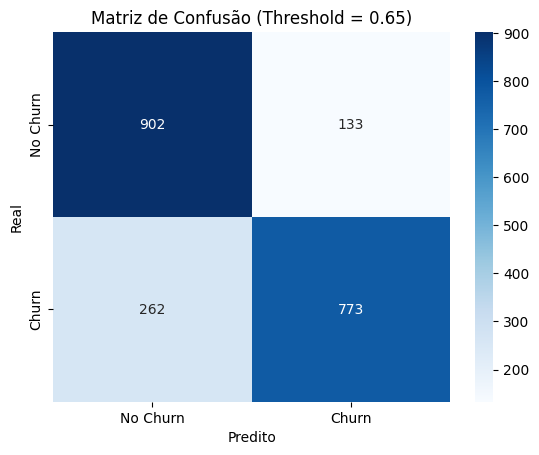

In [22]:
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Matriz de Confusão (Threshold = {best_threshold:.2f})')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 16. ROC Curve with Optimal Point

This curve visualizes the trade-off between sensitivity and specificity. The red dot marks the optimal threshold based on Youden's J.

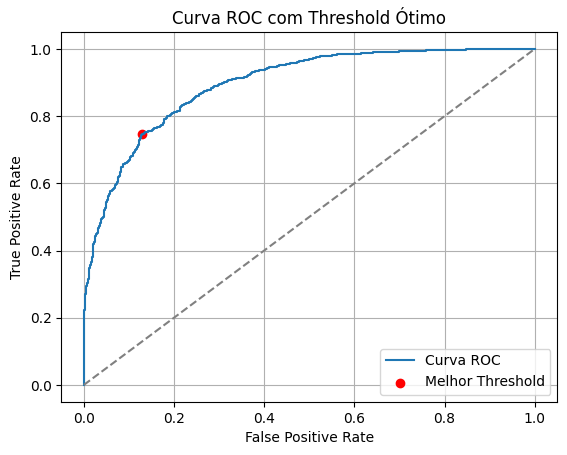

In [23]:
plt.plot(fpr, tpr, label='Curva ROC')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label='Melhor Threshold')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC com Threshold Ótimo')
plt.legend()
plt.grid()
plt.show()